<a href="https://colab.research.google.com/github/sebastianjbustos/superstore-analysis/blob/main/SuperStore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**



**Business Context:**

The United States is a very large country with a vast variety of markets and products. A SuperStore in this country has a database with all items sold in the store from January 2019 to December 2020.

This market has hired me to create visualizations to help identify sales patterns, which will assist them in making decisions about what to manufacture more of and what actions to take regarding this SuperStore. They have certain parameters such as order date, ship date, product category, customers, etc., that are considered and from which they would like to obtain specific information.

**Business Problem:** My task is to format the provided data and create visualizations that answer the specific questions the client has, as mentioned below.

**Analytical Context:** A CSV file (stored in the already created data folder) is provided containing details on order date, ship date, product category, customers, etc. The delimiter in the given CSV file is ; instead of the default ,. I will perform the following tasks with the data:

1. Read, transform, and prepare data for visualization.
2. Perform analysis and build visualizations of the data to identify patterns in the dataset.

The client has a specific set of questions they would like to get answers to. Visualizations should be provided to address these questions.

**EXTRACTING DATA:**

In [1]:
# Conexión Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES:**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**UNDESTANDING DATA:**

In [3]:
df = pd.read_excel('/content/drive/MyDrive/SuperStore_Dataset.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",7394,1,282668,Online
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",17394,3,382668,Online
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,23198,2,672742,Cards
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,11446,2,28615,Online
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,3008,2,-5264,Online


This Dataset had 2 columns that were eliminated previously on Excel, because every register were nule.

In [4]:
df.shape

(5901, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5901 non-null   int64         
 1   Order ID       5901 non-null   object        
 2   Order Date     5901 non-null   datetime64[ns]
 3   Ship Date      5901 non-null   datetime64[ns]
 4   Ship Mode      5901 non-null   object        
 5   Customer ID    5901 non-null   object        
 6   Customer Name  5901 non-null   object        
 7   Segment        5901 non-null   object        
 8   Country        5901 non-null   object        
 9   City           5901 non-null   object        
 10  State          5901 non-null   object        
 11  Region         5901 non-null   object        
 12  Product ID     5901 non-null   object        
 13  Category       5901 non-null   object        
 14  Sub-Category   5901 non-null   object        
 15  Product Name   5901 n

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Profit
count,5901.000000,5901,5901,5.901000e+03,5901.000000,5.901000e+03
mean,5022.422471,2020-02-29 01:53:57.620742144,2020-03-04 00:08:47.097102336,1.317547e+05,3.781901,1.921647e+05
min,1.000000,2019-01-01 00:00:00,2019-01-05 00:00:00,3.000000e+00,1.000000,-3.839990e+07
25%,2486.000000,2019-09-11 00:00:00,2019-09-15 00:00:00,8.448000e+03,2.000000,2.308000e+03
50%,5091.000000,2020-03-16 00:00:00,2020-03-19 00:00:00,1.929600e+04,3.000000,3.574200e+04
75%,7456.000000,2020-09-14 00:00:00,2020-09-16 00:00:00,1.144240e+05,5.000000,1.469020e+05
max,9994.000000,2020-12-31 00:00:00,2021-01-05 00:00:00,2.396266e+07,14.000000,6.719981e+07
std,2877.977184,NaN,NaN,5.189775e+05,2.212917,1.813503e+06


**DATA CLEANING**

In [7]:
# Chequeando valores de la columna "Country"
df['Country'].unique()

array(['United States'], dtype=object)

We will only see data from United States.

In [8]:
# Como las columnas con ID ya que son insignificantes

df.drop('Row ID', axis=1, inplace=True)
df.drop('Order ID', axis=1, inplace=True)
df.drop('Customer ID', axis=1, inplace=True)
df.drop('Product ID', axis=1, inplace=True)

In [9]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,2019-01-01,2019-01-07,Standard Class,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",7394,1,282668,Online
1,2019-01-02,2019-01-07,Standard Class,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",17394,3,382668,Online
2,2019-01-02,2019-01-07,Standard Class,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,Technology,Phones,GE 30522EE2,23198,2,672742,Cards
3,2019-01-03,2019-01-05,First Class,Lena Radford,Consumer,United States,Los Angeles,California,West,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,11446,2,28615,Online
4,2019-01-03,2019-01-08,Standard Class,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,Technology,Accessories,Imation Clip USB flash drive - 8 GB,3008,2,-5264,Online


**REMOVING NULL VALUES**

In [10]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Payment Mode     0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.duplicated().sum()

0

There are no null  or missing values. We can proceed to perform Exploratory Data Analysis.

### EXPLORATORY DATA ANALYSIS (EDA) ###

In [13]:
# Fijar estilo de los gráficos

sns.set(style="whitegrid")

**SALES ANALYSIS**

**There are 4 regions, Central, East, South and West. Which region had more sales?**

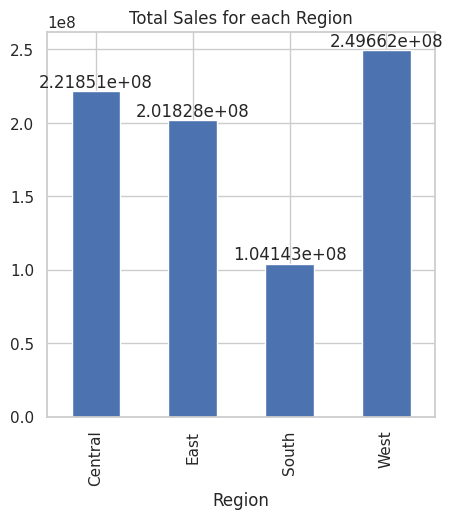

In [14]:
# Sales Analysis per Region

ventas_region = df.groupby('Region')['Sales'].sum().plot.bar(figsize=(5,5))
plt.title("Total Sales for each Region")
for container in ventas_region.containers:
    ventas_region.bar_label(container)

Text(0.5, 1.0, 'Sales for each Region Percentage')

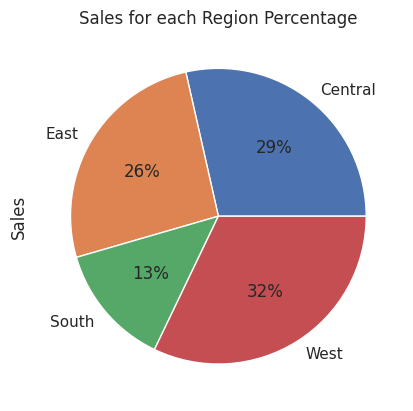

In [15]:
df.groupby('Region')['Sales'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Sales for each Region Percentage")

We can see that sales in the West region are higher than in the other regions, followed by Central and East. South comes last, with sales numbers at half of what was sold in the West. To be more precise, we created a pie chart to see the percentage of sales in each region, where we can see that the West region has the highest percentage, just like the bar chart.

**Which Segment was sold the most for each Region?**




<Axes: xlabel='Region', ylabel='Count'>

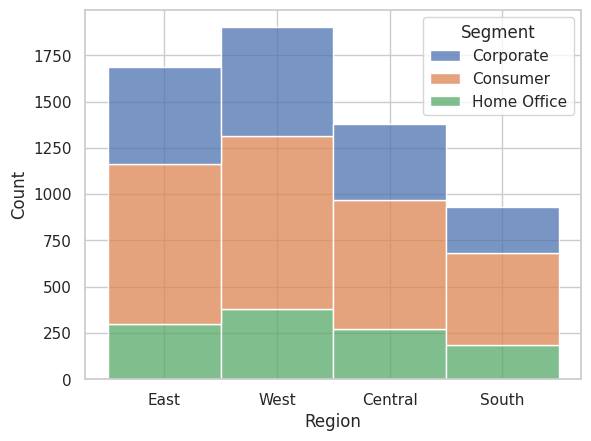

In [16]:
# Total Sales per Region, filtered by Segment

sns.histplot(data=df, x= 'Region', hue="Segment", multiple="stack")

Another category to consider when discussing sales is the Segment. With this chart, we conclude that the West region is where most purchases were made. Additionally, we see that purchases in the corporate sector are above all others.

**Which Segment had more sales?**

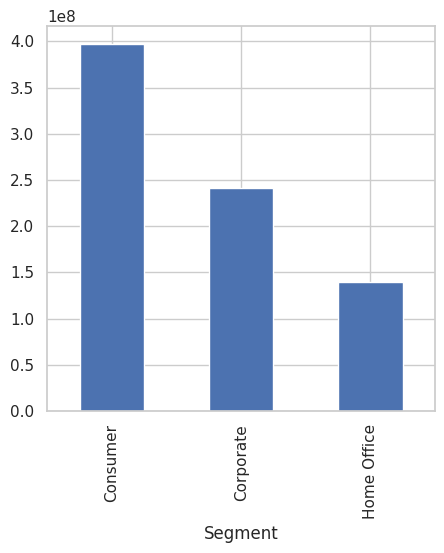

In [17]:
# Sales Analysis per Segment

sales_seg = df.groupby('Segment')['Sales'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Sales for each Segment')

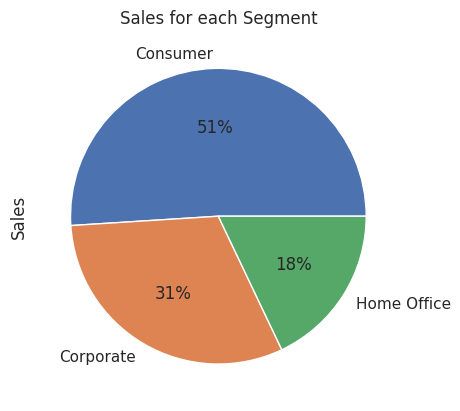

In [18]:
df.groupby('Segment')['Sales'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Sales for each Segment")

We can notice that, by a wide margin, the Consumer segment represents the highest total sales, followed by Corporate and Home Office.

**Which cities had more Sales?**

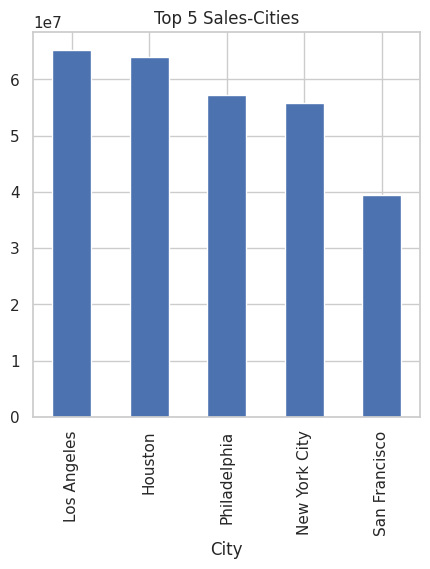

In [19]:
# Top 5 Sales-City

ventas_ciudad = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top 5 Sales-Cities")
plt.show()

We can observe that Los Angeles has the highest number of sales, leading the Top 5 by not much difference from Houston. Next is Philadelphia, which is not far behind New York. Lastly, with a noticeable difference, San Francisco comes in last.

**Which State had more Sales?**

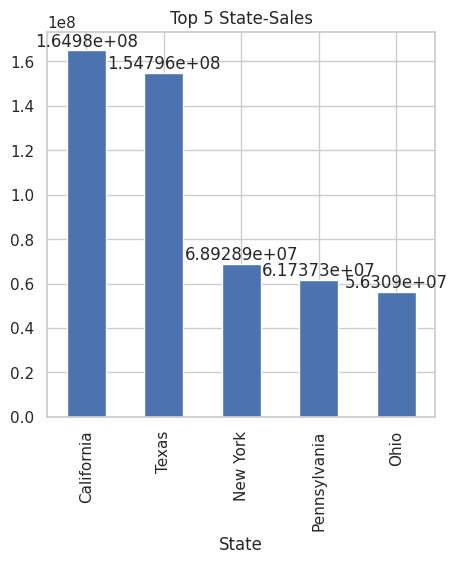

In [20]:
# Top 5 State-Sales

ventas_estado = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top 5 State-Sales")
for container in ventas_estado.containers:
    ventas_estado.bar_label(container)

The state with the highest number of sales is California, followed by Texas.

It is most likely that this distribution is because California has the largest population, so it is undoubtedly going to generate the most sales. Similarly, the second state with the highest population is Texas.

**Monthly Sales Evolution**

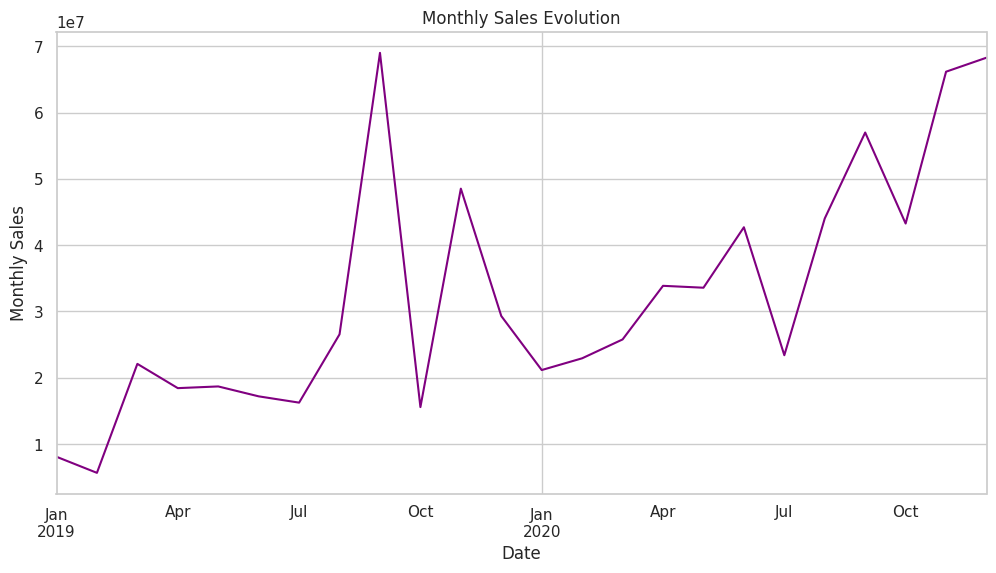

In [21]:
# Monthly Sales Evolution

df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='purple')

# Modificar las etiquetas del eje Y para mostrar valores en millones

plt.title('Monthly Sales Evolution')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.show()

Since the dataset covers sales from 2019 to 2020, we don't have a wide range. However, we can clearly see that between July and October, or more precisely in September, there was a sales peak in 2019. In 2020, the peak was after October, and it continued to rise into December.

In the United States, the start of the school year occurs between late August and early September. This is likely a factor contributing to the increase in sales during that period in both years, significantly more so in 2019.

**Which Category had more Sales?**

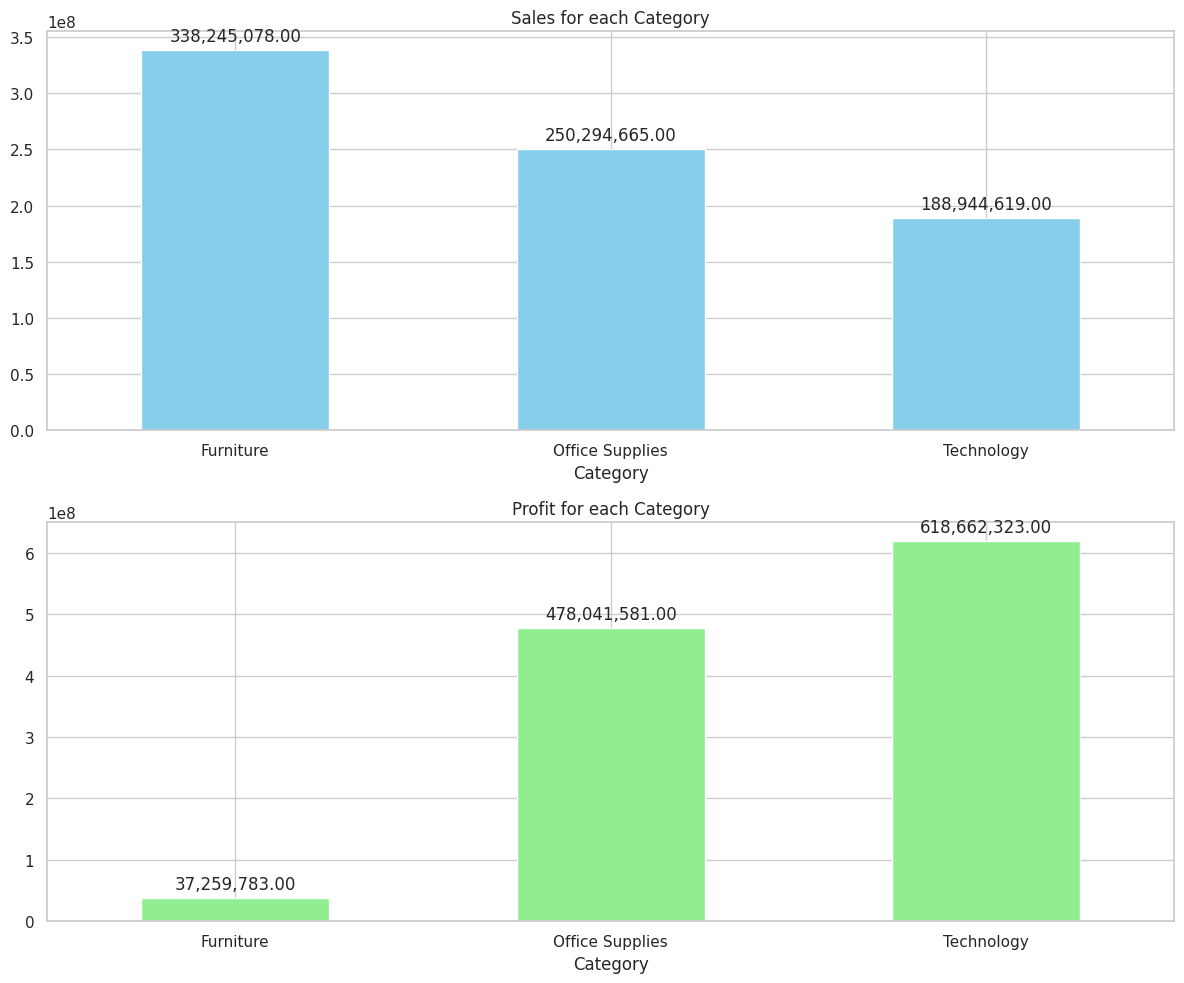

In [22]:
# Sales for each Category

category_sales = df.groupby('Category')['Sales'].sum()
category_profit = df.groupby('Category')['Profit'].sum()

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
category_sales.plot(kind='bar', ax=ax[0], color='skyblue', title='Sales for each Category')
category_profit.plot(kind='bar', ax=ax[1], color='lightgreen', title='Profit for each Category')

# Rotating Categories names
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha="center")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0, ha="center")

# Add values on top of the bars
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

When talking about Sales by Category, the highest sales were in the Furniture category. However, when talking about Profits, we see more in the Technology category. Why might this be?

**SALES INSIGHTS**

- The **West** region has the highest number of sales (32%), followed by **Central** (29%). **South** has the lowest percentage (13%).
- Considering the **Segment**, the highest percentage of sales is from **Consumer** (51%), followed by **Corporate** (31%) and ending with **Home Office** (18%).
- The highest number of sales occurs in **Los Angeles**, followed by **Houston**.
 -The state with the highest number of sales is **California**, followed by **Texas**.
- Looking at the **Monthly Sales Evolution** chart, we can see a drop in sales at the beginning of both years (2019 and 2020). In the middle of the year (between July and October), there is an increase in sales in both years, with 2019 experiencing a very high peak in sales.
- The most sold category is **Furniture**, followed by **Office Supplies** and then **Technology**.






Once Sales Insights have been identified, and Profits have been introduced, we will proceed to perform additional analyses on the latter

**PROFIT ANALYSIS**

**Which Region was profitable?**

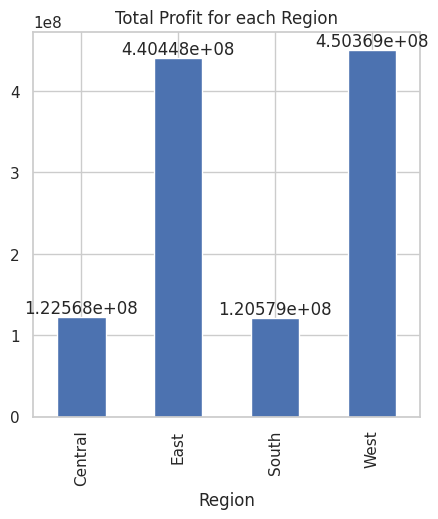

In [23]:
# Profit Analysis por each Region

profit_region = df.groupby('Region')['Profit'].sum().plot.bar(figsize=(5,5))
plt.title("Total Profit for each Region")
for container in profit_region.containers:
    profit_region.bar_label(container)

Text(0.5, 1.0, 'Profit per Region')

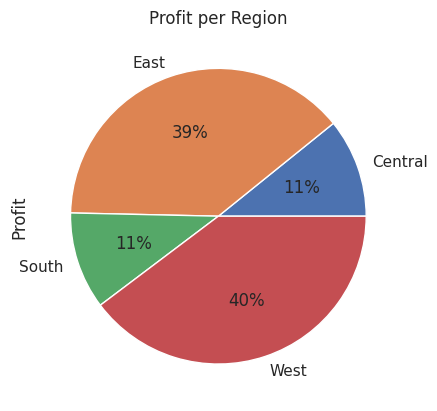

In [24]:
df.groupby('Region')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profit per Region")

Using the regions, we now evaluate the Profit in each region. The highest profit is found in West, followed closely by East. Then, the profit in Central and South would be the same.

**Which Segment was profitable?**

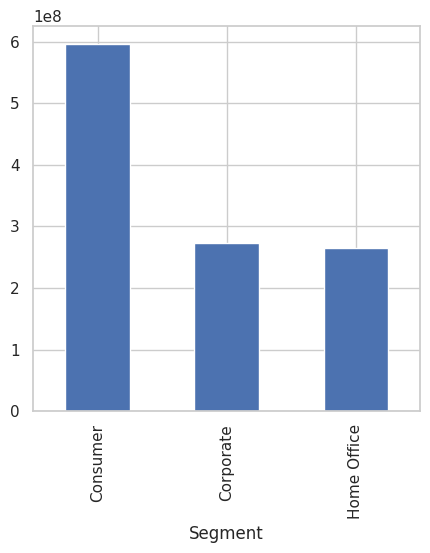

In [25]:
# Profit for each Segment

profit_seg = df.groupby('Segment')['Profit'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Profit for each Segment')

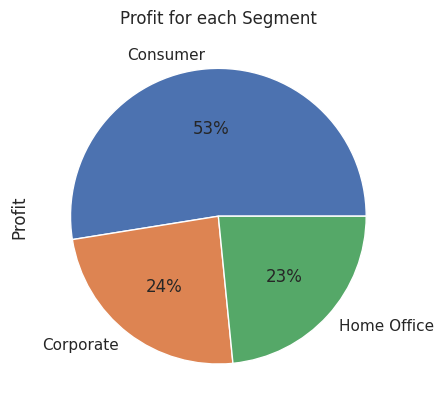

In [26]:
df.groupby('Segment')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profit for each Segment")

We can observe by a wide margin that "Consumer" is the Segment that achieved the highest profitability in the recorded data.

**Which citis were profitable?**

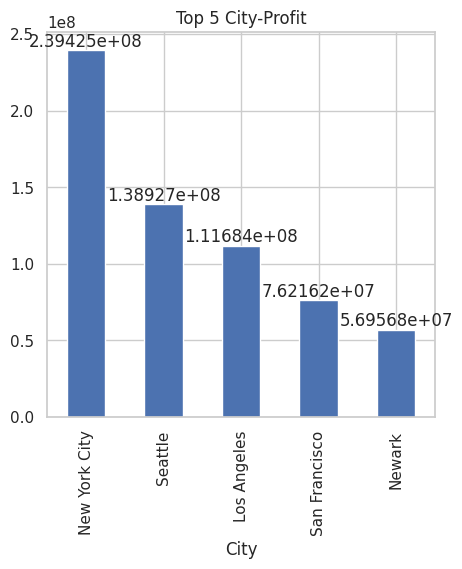

In [27]:
# Top 5 City-Profit

profit_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top 5 City-Profit")
for container in profit_city.containers:
    profit_city.bar_label(container)

**Which States had more profit?**

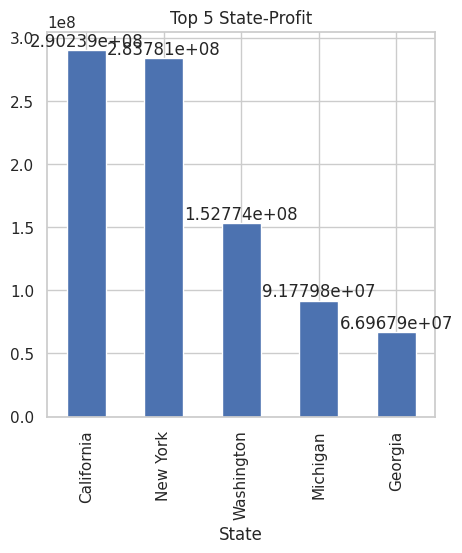

In [28]:
# Top 5 State-Profit

profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top 5 State-Profit")
for container in profit_state.containers:
    profit_state.bar_label(container)

As seen in the Sales charts, California is the state with the highest population, so it is also logical to have higher profitability in this state. However, we can observe that in this case, New York is the second state with the highest profitability.

**Is there any relation between Sales and Profit in Categories?**

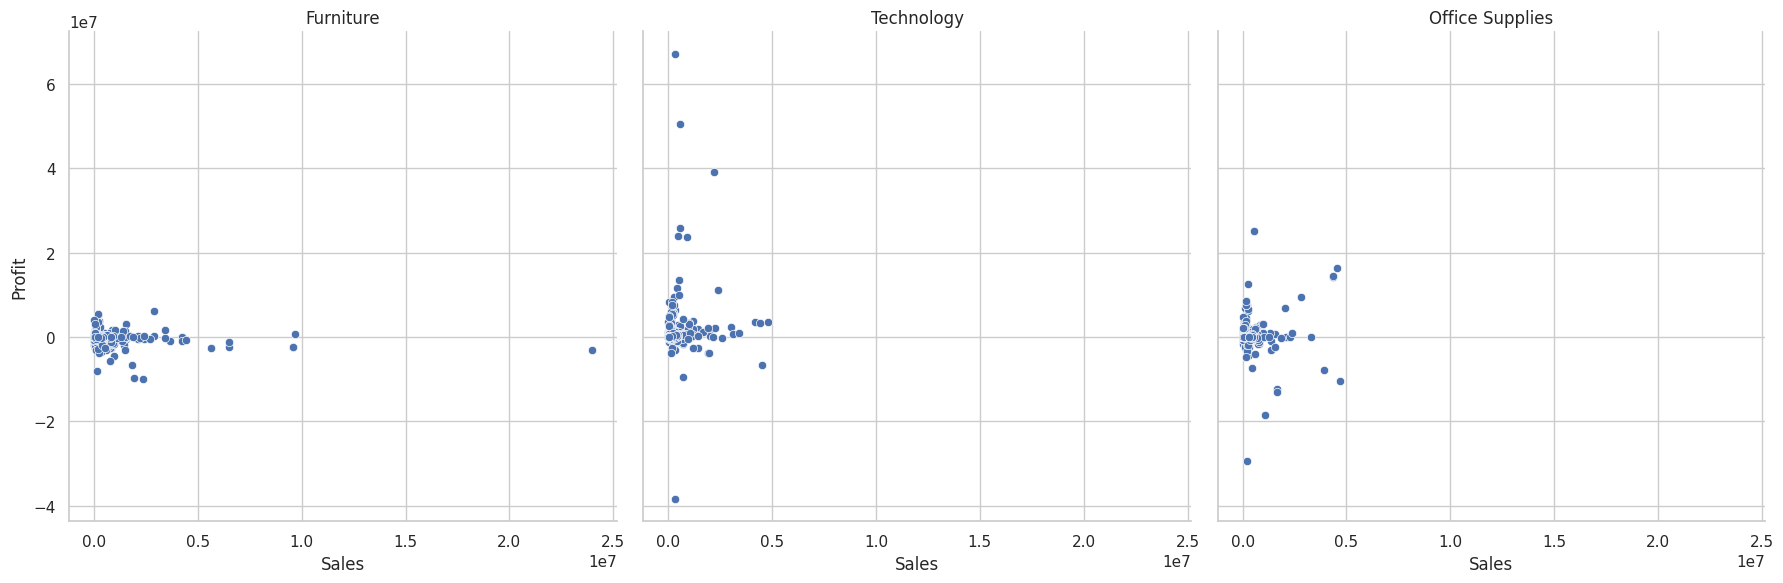

In [29]:
# Dispertion graphic for each Category

g = sns.FacetGrid(df, col="Category", col_wrap=3, height=6, palette='Set2')
g.map(sns.scatterplot, 'Sales', 'Profit')
g.set_axis_labels('Sales', 'Profit')
g.set_titles(col_template="{col_name}")
plt.show()

Three charts were created to examine the Sales-Profit relationship for each category separately. We can see that the Technology category involves both higher profits and higher losses. The Furniture category remains consistent in terms of the profit-loss relationship. The Office Supplies category shows a similar trend, but with higher profits and higher losses.

**What Categories where profitable?**

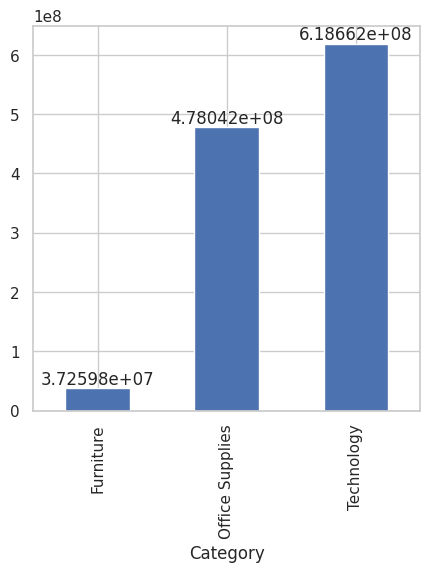

In [30]:
# Profit per Category

profit_categ = df.groupby('Category')['Profit'].sum().plot.bar(figsize=(5,5))
for container in profit_categ.containers:
    profit_categ.bar_label(container)

Text(0.5, 1.0, 'Profitability of each Category of product')

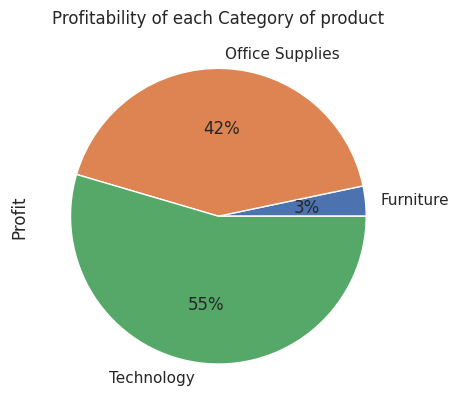

In [31]:
df.groupby('Category')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profitability of each Category of product")

This chart aims to show the number of orders placed depending on the product category. It is clear that the "Office Supplies" category had the highest number of orders. There is a slight difference between Furniture and Technology.

**PROFIT INSIGHTS**

Using the same charts as those used for Sales, we can see the following insights:

- The highest profit is achieved by the **West** region (40%), followed closely by **East** (39%). We can conclude that the **South** and Central regions are the least profitable, both with 11%.
- **Consumer** is the segment with the highest profit percentage (51%), followed by **Corporate** (24%) and then **Home Office** (23%).
- The most profitable city is **New York City**, followed by **Seattle**.
- The state with the most profit is **California**, followed by **New York**.
- **Technology** is the category with the highest volatility in its **Sales-Profit** relationship. It has a higher percentage compared to other categories (55%), followed by **Office Supplies** (42%) and lastly **Furniture** with only 3%.




**PAYMENT METHOD FOR EACH SHIP MODE**

I created this chart outside of the sales and profit analyses to take this information into account.

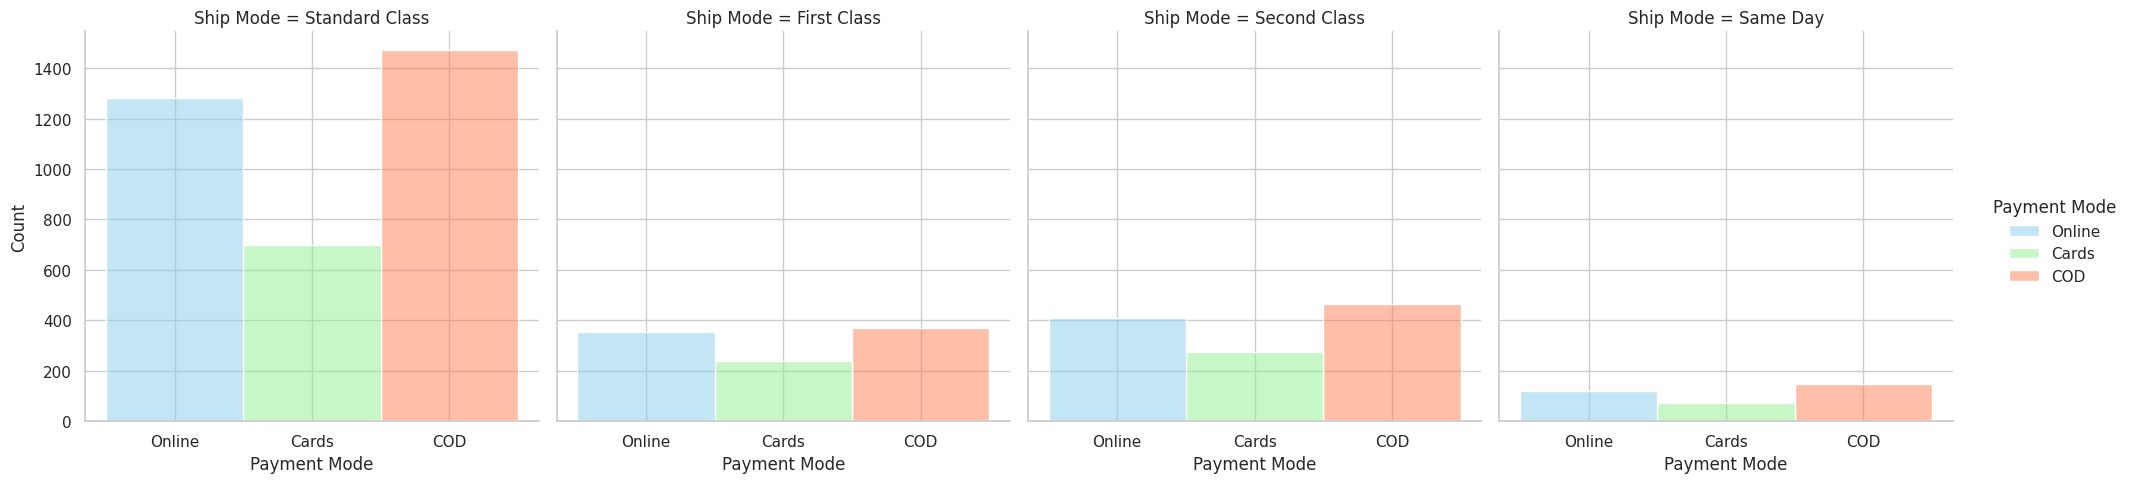

In [32]:
colores = ['skyblue', 'lightgreen', 'coral',]

sns.displot(data=df, x="Payment Mode", col="Ship Mode", hue= 'Payment Mode', palette= ['skyblue', 'lightgreen', 'coral',])
plt.show()

Here we can observe that, depending on the Payment Mode, there are variations in the Ship Mode. Across all payment methods, with more or less difference, there is a preference for COD, followed by Online, and finally Cards. Additionally, we can infer that Standard Class is the most frequently purchased shipping class.

### MACHINE LEARNING MODEL ###

RANDOM FOREST REGRESSOR TO PREDICT VARIABLES



In [33]:
df_ML = df.copy()
df_ML2 = df.copy()

In [34]:
df_ML.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,2019-01-01,2019-01-07,Standard Class,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",7394,1,282668,Online
1,2019-01-02,2019-01-07,Standard Class,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",17394,3,382668,Online
2,2019-01-02,2019-01-07,Standard Class,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,Technology,Phones,GE 30522EE2,23198,2,672742,Cards
3,2019-01-03,2019-01-05,First Class,Lena Radford,Consumer,United States,Los Angeles,California,West,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,11446,2,28615,Online
4,2019-01-03,2019-01-08,Standard Class,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,Technology,Accessories,Imation Clip USB flash drive - 8 GB,3008,2,-5264,Online


PREDICT QUANTITY

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Eliminamos las columnas que no serán utilizadas en la predicción
X = df_ML.drop(['Quantity'], axis=1)
y = df_ML['Quantity']

# Codificar variables categóricas
label_encoder = LabelEncoder()
X['Order Date'] = label_encoder.fit_transform(X['Order Date'])
X['Ship Date'] = label_encoder.fit_transform(X['Ship Date'])
X['Product Name'] = label_encoder.fit_transform(X['Product Name'])
X['Ship Mode'] = label_encoder.fit_transform(X['Ship Mode'])
X['Customer Name'] = label_encoder.fit_transform(X['Customer Name'])
X['Segment'] = label_encoder.fit_transform(X['Segment'])
X['Country'] = label_encoder.fit_transform(X['Country'])
X['City'] = label_encoder.fit_transform(X['City'])
X['State'] = label_encoder.fit_transform(X['State'])
X['Region'] = label_encoder.fit_transform(X['Region'])
X['Category'] = label_encoder.fit_transform(X['Category'])
X['Sub-Category'] = label_encoder.fit_transform(X['Sub-Category'])
X['Payment Mode'] = label_encoder.fit_transform(X['Payment Mode'])

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Calculamos el MSE y MAE en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {r2}')

Mean Squared Error: 4.447566469093989
Mean Absolute Error: 1.6169009314140559
Mean Squared Error: 0.11830849192514936


The same model within Order Date, Ship Date and Customer Name. This was made to check if metrics change within this variables.

In [36]:
# Eliminate Order Date, Ship Date and Customer Name columns

df_ML2.drop('Order Date', axis=1, inplace=True)
df_ML2.drop('Ship Date', axis=1, inplace=True)
df_ML2.drop('Customer Name', axis=1, inplace=True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Separate X and Y
X = df_ML2.drop(['Quantity'], axis=1)
y = df_ML2['Quantity']

# Encoding Categorical Variables
label_encoder = LabelEncoder()
X['Product Name'] = label_encoder.fit_transform(X['Product Name'])
X['Ship Mode'] = label_encoder.fit_transform(X['Ship Mode'])
X['Segment'] = label_encoder.fit_transform(X['Segment'])
X['Country'] = label_encoder.fit_transform(X['Country'])
X['City'] = label_encoder.fit_transform(X['City'])
X['State'] = label_encoder.fit_transform(X['State'])
X['Region'] = label_encoder.fit_transform(X['Region'])
X['Category'] = label_encoder.fit_transform(X['Category'])
X['Sub-Category'] = label_encoder.fit_transform(X['Sub-Category'])
X['Payment Mode'] = label_encoder.fit_transform(X['Payment Mode'])

# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# We make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# We calculate the MSE and MAE on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {r2}')

Mean Squared Error: 4.439143945808636
Mean Absolute Error: 1.6229466553767993
Mean Squared Error: 0.11997818417345218


The results for both models, after removing certain variables, are quite similar. Therefore, I conclude that these variables are not hindering the model; they do not exhibit negative behavior within the model.

In [38]:
X

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Profit,Payment Mode
0,3,1,0,136,18,1,0,4,375,7394,282668,2
1,3,1,0,136,18,1,0,4,375,17394,382668,2
2,3,1,0,136,18,1,2,13,688,23198,672742,1
3,0,0,0,227,3,3,1,14,1263,11446,28615,2
4,3,1,0,368,41,0,2,0,868,3008,-5264,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5896,3,0,0,279,30,1,0,4,374,213136,121176,0
5897,3,1,0,122,3,3,1,3,396,295904,45188,2
5898,3,0,0,229,4,3,1,8,273,388024,-6048,2
5899,3,0,0,279,30,1,1,3,1546,462776,19791,0


I will use Leave-One-Out Cross-Validation to see how it performs on the created model.

In [39]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [40]:
# create loocv
cv = LeaveOneOut()

In [41]:
# evaluate the model (MAE)
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer
MAE = make_scorer(mean_absolute_error)
scores = cross_val_score(rf_regressor, X, y, scoring=MAE, cv=cv,error_score='raise',verbose=1)
# convert to positives
scores = abs(scores)
# report perfomance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.8min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 15.3min
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed: 34.5min
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed: 61.3min
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed: 95.8min
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed: 138.0min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed: 187.9min
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed: 245.3min
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed: 310.6min
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed: 383.7min


MAE: 1.555 (1.329)


We will do another test also using cross validation, with cross_val_score

In [42]:
df_cross = df_ML2.copy()

In [43]:
from sklearn.metrics import make_scorer

# X e Y
X = df_cross.drop(['Quantity'], axis=1)
y = df_cross['Quantity']

# Encoding categorical values
label_encoder = LabelEncoder()
X['Product Name'] = label_encoder.fit_transform(X['Product Name'])
X['Ship Mode'] = label_encoder.fit_transform(X['Ship Mode'])
X['Segment'] = label_encoder.fit_transform(X['Segment'])
X['Country'] = label_encoder.fit_transform(X['Country'])
X['City'] = label_encoder.fit_transform(X['City'])
X['State'] = label_encoder.fit_transform(X['State'])
X['Region'] = label_encoder.fit_transform(X['Region'])
X['Category'] = label_encoder.fit_transform(X['Category'])
X['Sub-Category'] = label_encoder.fit_transform(X['Sub-Category'])
X['Payment Mode'] = label_encoder.fit_transform(X['Payment Mode'])

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# We define the metric to be used with the cross validation
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# We apply the cross validation with 5 divisors (K-Fold)
cv_results = cross_val_score(rf_regressor, X, y, cv=5, scoring=mse_scorer)

# We show the results
print("Cross-Validation Mean Squared Error:", -cv_results.mean())



Cross-Validation Mean Squared Error: 4.3573424558475295


- Utilicé cross_val_score para realizar la validación cruzada.
- Definí la métrica a utilizar, el error cuadrático medio (MSE).
- Apliqué la validación cruzada con 5 divisiones (K-Fold) utilizando cv=5.
- Se muestra el MSE promedio obtenido a través de todas las particiones.
